### Linear Regression:

**y = wx + b**

* x: Independent Variable
* y: Dependent Variable
* w: weight 
* b: bias

### Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithm.
Used for updating the parameters of the learning model.

**w = w - α*dw**
**b = b - α*db**

### Learning Rate (α):

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving
towards a minimum of a loss function.

In [37]:
# import libraries

import numpy as np

**Linear Regression**

In [38]:
class Linear_Regression():

    def __init__(self, learning_rate, iteration_count): # initiate hyperparameters
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
    
    def fit(self, X, Y):
        
        self.X = X
        self.Y = Y

        # number of training examples and features
        self.m, self.n = X.shape # number of rows and columns

        # initiating weight and bias
        self.w = np.zeros(self.n)
        self.b = 0

        # implementing gradient descent

        for i in range(self.iteration_count):
            self.update_weights()
    
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)

        # calculate gradients

        dw = -(2 * self.X.T).dot(self.Y - Y_prediction)/self.m
        db = -2 * np.sum(self.Y - Y_prediction)/self.m

        # updating the weights

        self.w -= self.learning_rate*dw
        self.b -= self.learning_rate*db

    def predict(self, X):
        
        return X.dot(self.w) + self.b

Using Linear Regression model for prediction

In [39]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
from sklearn.metrics import r2_score

Data Preprocessing

In [40]:
# loading data from csv to a pandas dataframe

salary_data = pd.read_csv("salary_data.csv")

In [41]:
# viewing the first 5 lines

salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [42]:
# shape of the data

salary_data.shape

(30, 2)

In [43]:
# check for missing values

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and target

In [44]:
X = salary_data.drop(columns="Salary", axis=1).values
Y = salary_data["Salary"].values

In [45]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [46]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliiting data to training and test data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

Model Training

In [48]:
model = Linear_Regression(learning_rate=0.02, iteration_count=1000)

In [49]:
model.fit(X_train, Y_train)

In [50]:
# printing the parameter values (weight & bias)

print(f"weight: {model.w[0]}")
print(f"bias: {model.b}")

weight: 9514.400999035135
bias: 23697.406507136307


y = wx + b

salary = 9514 * experience + 23697

In [51]:
test_data_prediction = model.predict(X_test)

print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the prediction

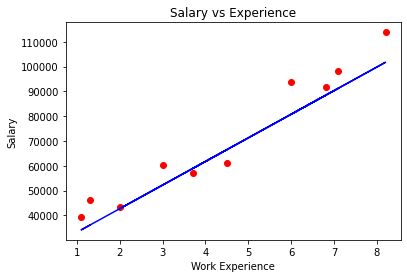

In [52]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

Model Evaluation

In [56]:
X_addC = sm.add_constant(X)
result = sm.OLS(Y, X_addC).fit()
r_score = r2_score(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
mae = mean_absolute_error(Y_test, test_data_prediction)

print(f"R^2 Score (sklearn): {r_score}")
print(f"R^2 Score (statsmodels): {result.rsquared}, {result.rsquared_adj}")
print(f"MSE: {mse}")
print(f"RMSE: {math.sqrt(mse)}")
print(f"MAE: {mae}")

R^2 Score (sklearn): 0.904128890392985
R^2 Score (statsmodels): 0.9569566641435086, 0.9554194021486339
MSE: 60483757.90524936
RMSE: 7777.1304415735085
MAE: 6675.841368352294
